In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from scipy.stats import beta
%matplotlib inline
from math import sqrt

# Центральная предельная теорема своими руками

_Задача была решена для двух распределений._

## 1. Бета-распределение 

### 1.1 Описание распределения, вычисление ${E} [X]$ и ${D} [X]$

В качестве первого распределения было выбрано **Бета-распределение**.

Статья в Википедии на [русском](https://ru.wikipedia.org/wiki/%D0%91%D0%B5%D1%82%D0%B0-%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5) и на [английском](https://en.wikipedia.org/wiki/Beta_distribution).

Пусть распределение случайной величины $X$ задаётся плотностью вероятности $f_{X}$, имеющей вид:

$${\displaystyle f_{X}(x)={\frac {1}{\mathrm {B} (\alpha ,\beta )}}\,x^{\alpha -1}(1-x)^{\beta -1}}f_{X}(x)={\frac {1}{\mathrm {B} (\alpha ,\beta )}}\,x^{\alpha -1}(1-x)^{\beta -1},
$$ где

$ \alpha ,\beta > 0$ произвольные фиксированные параметры, и

${\displaystyle \mathrm {B} (\alpha ,\beta )=\int \limits _{0}^{1}x^{\alpha -1}(1-x)^{\beta -1}\,dx}\mathrm {B} (\alpha ,\beta )=\int \limits _{0}^{1}x^{\alpha -1}(1-x)^{\beta -1}\,dx$ — бета-функция.

Тогда случайная величина $X$ имеет бета-распределение. Пишут: ${\displaystyle X\!\sim \mathrm {B} (\alpha ,\beta )}.$

In [3]:
a, b = 4.0, 4.0 # set alpha and beta parameters of distribution

Математическое ожидание и дисперсия случайной величины $X$, имеющей бета-распределение, имеют вид:

$$\mathbb {E} [X]={\frac {\alpha }{\alpha +\beta }},$$

In [4]:
e_X = a/(a+b)
e_X

0.5

$$\mathrm {D} [X]={\frac {\alpha \beta }{(\alpha +\beta )^{2}(\alpha +\beta +1)}}.$$


In [5]:
d_X = a*b/(pow((a+b),2)*(a+b+1))
d_X

0.027777777777777776

### 1.2 Гистограмма выборки и теоретическая плотность распределения

In [6]:
x = np.linspace(0, 1, 1000)

In [7]:
beta_dist = beta(a, b)
sample = beta.rvs(a, b, size=1000) #computes 1000 random variables distributed according to beta distribution
pdf = beta_dist.pdf(x) # computes the Probability Density Function at values x

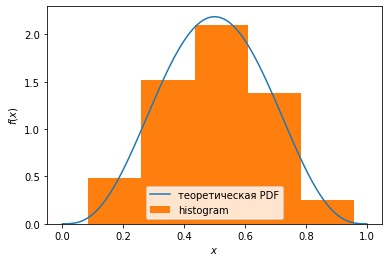

In [8]:
# Строим гистограмму выборки и поверх неё теоретическую плотность распределения
plt.plot(x, pdf, label='теоретическая PDF')
plt.hist(sample, bins =5, density=True, label='histogram')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend()

### 1.3 Гистограммы распределений выборочных средних и плотность нормального распределения

In [9]:
# plot_samples генерирует 1000 выборок размера n, строит гистограмму выборочных средних
# и плотность нормального распределния с параметрами e_X и sqrt(d_X/n).

def plot_samples(n):
    means = []
    for i in range (1000):
        means.append(np.mean(beta.rvs(a, b, size=n)))
    plt.hist(means, density=True, label='histogram')
    norm_dist= sts.norm(e_X, sqrt(d_X/n))
    x = np.linspace(0., 1., 1000)
    pdf = norm_dist.pdf(x)
    plt.plot(x, pdf, label='normal distribution pdf')
    plt.legend()
    plt.title("Sample size %d" % n)
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.show()

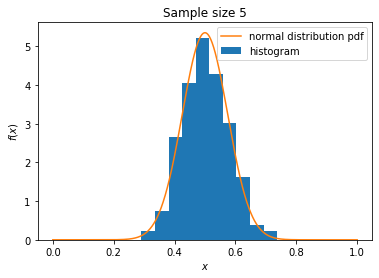

In [10]:
#выборки объёма 5
plot_samples(5)

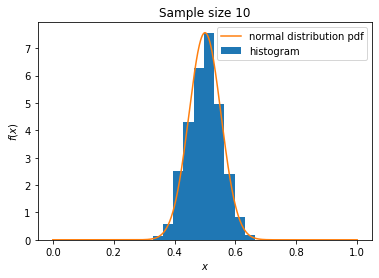

In [11]:
#выборки объёма 10
plot_samples(10)

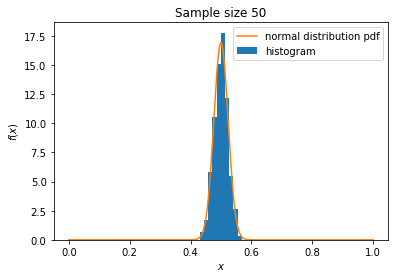

In [12]:
#выборки объёма 50
plot_samples(50)

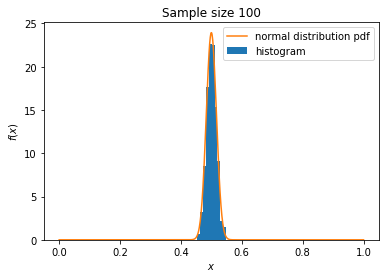

In [13]:
#выборки объёма 100
plot_samples(100)

### 1.4 Выводы

Из графиков можем заметить: утверждение центральной предельной теоремы о том, что распределение выборочных средних достаточно хорошо описывается нормальным распределением $N(\mu = \mathbb{E}X, \sigma^2 = \frac{\mathbb{D}X}{n})$, а в нашем случае $N(\mu = 0.5, \sigma^2 = \frac{0.028}{n})$, выполняется.

Также можем заметить, что с ростом n точность нормальной аппроксимации увеличивается. С ростом n происходит сглаживание, гистограммы по форме сильнее напоминают нормальное распределение

## 2. Экспоненциальное распределение

### 2.1 Описание распределения, вычисление ${E} [X]$ и ${D} [X]$

В качестве второго распределения было выбрано **Экспоненциальное распределение**.

Статья в Википедии на [русском](https://ru.wikipedia.org/wiki/%D0%AD%D0%BA%D1%81%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%86%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D0%BE%D0%B5_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D0%B5) и на [английском](https://en.wikipedia.org/wiki/Exponential_distribution).

Случайная величина $X$ имеет экспоненциальное распределение с параметром $\lambda >0$, если её плотность имеет вид

$$f_{X}(x)={\begin{cases}\lambda \,e^{{-\lambda x}},&x\geq 0,\\0,&x<0.\end{cases}}.$$

Математическое ожидание и дисперсия случайной величины $X$, имеющей экспоненциальное распределение, имеют вид:

$${{E}}[X]={\frac  {1}{\lambda }},$$

$${{D} [X]={\frac {1}{\lambda ^{2}}}}.$$

Пусть $\lambda = 1$, тогда

In [14]:
e_X = 1/1
e_X

1.0

In [15]:
d_X = 1/pow(1,2)
d_X

1.0

### 2.2 Гистограмма выборки и теоретическая плотность распределения

In [16]:
x = np.linspace(0, 10, 1000)

In [17]:
expon_dist = sts.expon() 
sample2 = expon_dist.rvs(size=1000) # computes 1000 random variables distributed according to exp. distribution
pdf2 = expon_dist.pdf(x) # computes the Probability Density Function at values x

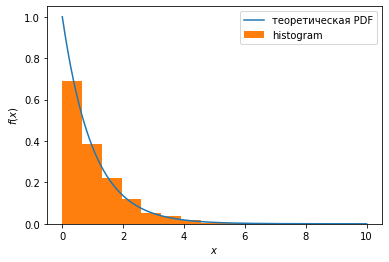

In [18]:
# Строим гистограмму выборки и поверх неё теоретическую плотность распределения
plt.plot(x, pdf2, label='теоретическая PDF')
plt.hist(sample2, density=True, label='histogram')
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend()

### 2.3 Гистограммы распределений выборочных средних и плотность нормального распределения

In [19]:
# plot_samples2 генерирует 1000 выборок размера n, строит гистограмму выборочных средних
# и плотность нормального распределния с параметрами e_X и sqrt(d_X/n).

def plot_samples2(n):
    means = []
    for i in range (1000):
        means.append(np.mean(expon_dist.rvs(size=n)))
    plt.hist(means, density=True, label='histogram')
    norm_dist= sts.norm(e_X, sqrt(d_X/n))
    x = np.linspace(0, 3, 1000)
    pdf = norm_dist.pdf(x)
    plt.plot(x, pdf, label='normal distribution pdf')
    plt.legend()
    plt.title("Объём выборки %d" % n)
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')
    plt.show()

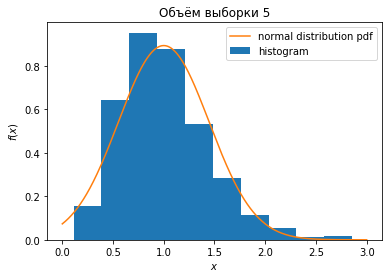

In [20]:
plot_samples2(5)

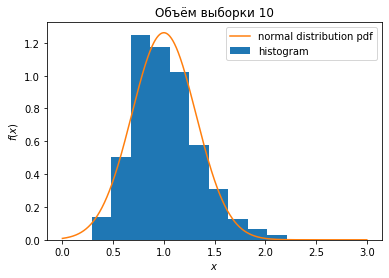

In [21]:
plot_samples2(10)

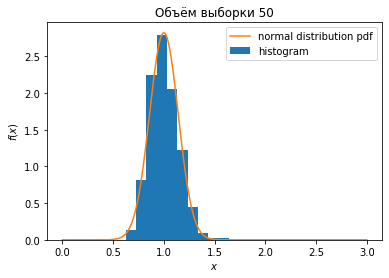

In [22]:
plot_samples2(50)

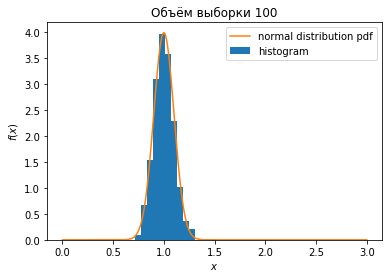

In [23]:
plot_samples2(100)

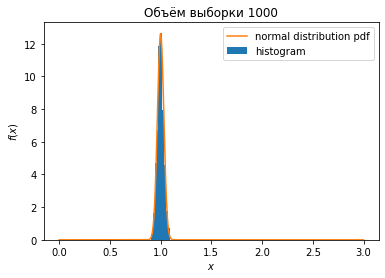

In [24]:
plot_samples2(1000)

### 2.4 Выводы

Из графиков можем заметить: утверждение центральной предельной теоремы о том, что распределение выборочных средних достаточно хорошо описывается нормальным распределением $N(\mu = \mathbb{E}X, \sigma^2 = \frac{\mathbb{D}X}{n})$, а в нашем случае $N(\mu = 1, \sigma^2 = \frac{1}{n})$ выполняется.

Также можем заметить, что с ростом n точность нормальной аппроксимации увеличивается. Гистограмма, построенная по выборкам
объема n = 5, скошена на одну сторону. С ростом n происходит сглаживание, гистограммы по форме сильнее напоминают нормальное распределение